# LAB 4


In [58]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.linalg as sls
import math
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split as tts


## Problem 1

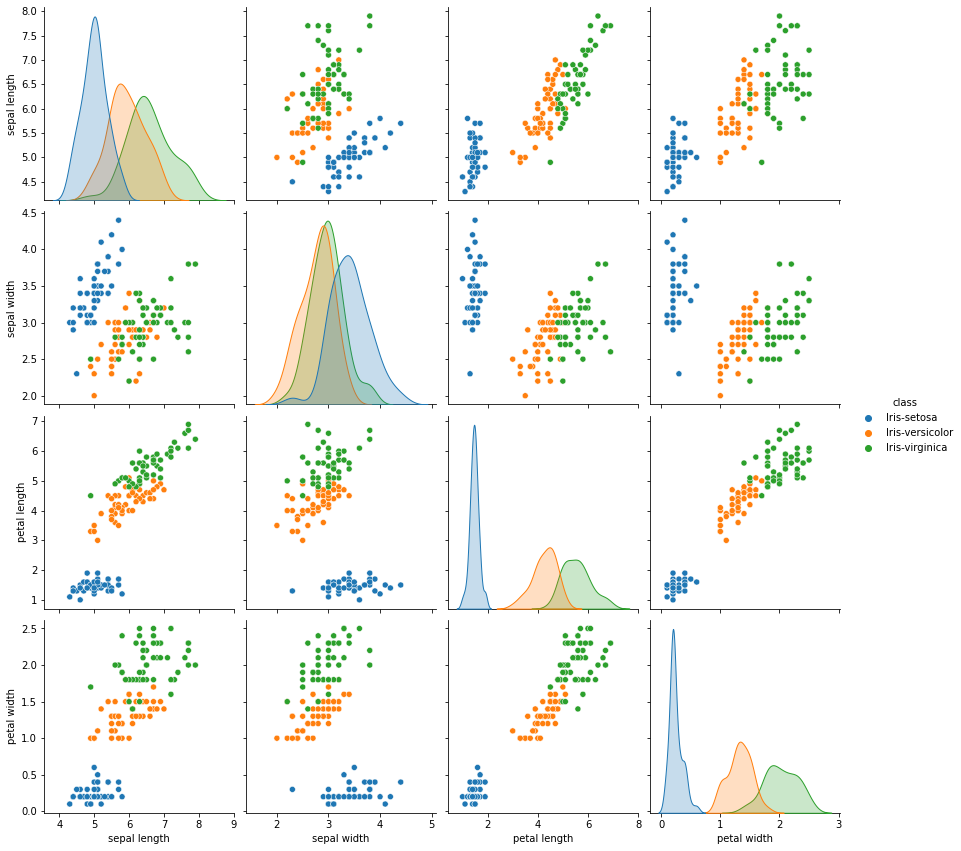

In [62]:
dataset = pd.read_csv("/content/drive/MyDrive/PRML/Lab2/irisdataset.csv",names = ["sepal length","sepal width","petal length","petal width","class"])
iris = pd.DataFrame(data = dataset)
X = iris.copy()
X = X.dropna()
lb = LabelEncoder()
X["class"] = lb.fit_transform(X["class"])
Y = X["class"]
X = X.drop("class",axis=1)
iplot = sns.pairplot(iris,hue="class",height = 3)
plt.show()
X_train,X_test,Y_train,Y_test = tts(X,Y,test_size =0.3,shuffle = True)

### Part 1,2,3

In [63]:
class Gaussian_Bayes_Classifier_new:
  class_prob = []
  cov_mat = np.array([])
  def __init__(self,matrix = None):
    self.matrix = matrix
    self.class_prob = []
    self.cov_mat = np.array([])
  def Train(self,X,Y):
    self.classes = np.unique(Y)
    self.means_arr = []
    self.vars_arr = []
    for _class in self.classes:
      X_class = X[Y==_class]
      mean_val = np.mean(X_class,axis = 0)
      self.means_arr.append(mean_val)
      var_val = np.var(X_class,axis = 0)
      self.vars_arr.append(var_val)
    self.means_arr = np.array(self.means_arr)
    self.vars_arr = np.array(self.vars_arr)
    for i in self.classes:
      prob = len(np.where(Y==i)[0])/len(Y)
      self.class_prob.append(prob)
    self.cov_mat = np.zeros((len(self.classes),X.shape[1],X.shape[1]))
    if(self.matrix == 1):
      self.cov_mat = (self.vars_arr[0][0])*np.identity(X.shape[1])
    elif(self.matrix == 2):
      self.cov_mat = X.cov()
      self.cov_mat = np.array(self.cov_mat)
    elif(self.matrix == 3):
      for j in range(len(self.classes)):
          X_cov_cls = X[Y==j]
          mat = X_cov_cls.cov()
          self.cov_mat[j] = mat
  def probability(self,vec,d,mean,cov):
    mat = vec - mean
    sigma= np.linalg.det(cov)
    inv_cov = np.linalg.inv(cov)
    const = 0
    try:
      const = (1/(((2*math.pi)**(d/2))*(sigma)))
    except:
      const = 0
    # print(const)
    req = (mat)@(inv_cov)@(mat.transpose())
    prob = const*(math.exp(-0.5*(req[0][0])))
    return prob
  def Test(self,X,Y):
    Y_pred = Y.to_numpy()
    Clss = []
    for i in range(len(X.index)):
      class_req = self.Predict(X.iloc[[i]])
      Clss.append(class_req)
    cnt = 0
    for i in range(len(Clss)):
      if(Clss[i] != Y_pred[i]):
        cnt += 1
    return(Clss,{'Score': 1 - (cnt/len(Y_pred))})

  def Predict(self,X,cov_mat_x = cov_mat):
    _X = X.to_numpy()
    arr = []
    for j in range(len(self.classes)):
      if(self.matrix == 3):
        cov_mat_x = self.cov_mat[j]
      else:
        cov_mat_x = self.cov_mat
      prob = self.probability(vec = _X,d = X.shape[1],mean = self.means_arr[j],cov = cov_mat_x)
      arr.append(prob)
    return(arr.index(max(arr)))
  def Plot_Decision_Boundary(self,X,Y,plot_colors):
    X = X.to_numpy()
    plot_step = 0.04
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                        np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    # print(pd.DataFrame(np.c_[xx.ravel(), yy.ravel()]))
    Z = self.Test(pd.DataFrame(np.c_[xx.ravel(), yy.ravel()]),pd.DataFrame(np.zeros((np.c_[xx.ravel(), yy.ravel()].shape[0],1))))
    ZZ = np.array(Z[0])
    ZZ = ZZ.reshape(xx.shape)
    cs = plt.contourf(xx, yy, ZZ, cmap=plt.cm.RdYlBu)
    # Plot the training points
    for i, color in zip(range(len(self.classes)), plot_colors):
        idx = np.where(Y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=i,cmap=plt.cm.RdYlBu, edgecolor='black',s=15)
    plt.legend()
    plt.show()
    return

Case 1
{'Score': 0.9333333333333333}


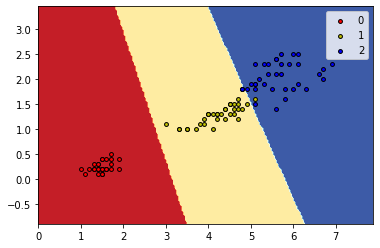

Case 2
{'Score': 0.8}


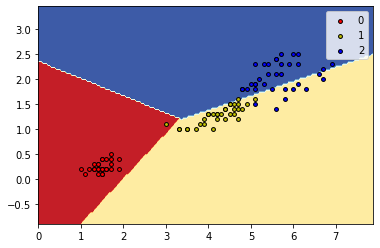

Case 3
{'Score': 0.9555555555555556}


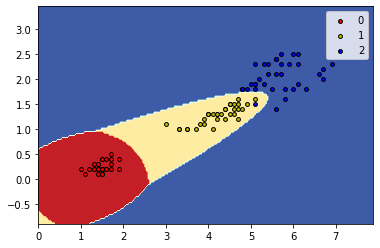

In [66]:
X_train,X_test,Y_train,Y_test = tts(X,Y,test_size =0.3,shuffle = True) 
for i in range(1,4):
  model_new = Gaussian_Bayes_Classifier_new(matrix = i)
  model_new.Train(X_train[["petal length","petal width"]],Y_train)
  # pred = model_new.Test(X,Y)
  pred1 = model_new.Test(X_test[["petal length","petal width"]],Y_test)
  print("Case",i)
  print(pred1[1])
  model_new.Plot_Decision_Boundary(X_train[["petal length","petal width"]],Y_train,'ryb')

### Part 4

In [ ]:
def cross_validation(clf,X,y,k=5):
  n_samples=X.shape[0]
  fold_size=n_samples//k
  scores=[]
  indices=np.arange(n_samples)
  np.random.shuffle(indices)
  for fold in range(k):
    start=fold*fold_size
    end=(fold+1)*fold_size
    X_val=X.iloc[indices[start:end]]
    y_val=y.iloc[indices[start:end]]
    X_train=X.drop(indices[start:end],axis=0)
    y_train=y.drop(indices[start:end],axis=0)
    clf.Train(X_train,y_train)
    acc=clf.Test(X_val,y_val)[1]['Score']
    scores.append(acc)
  return scores
for i in range(1,4):
  print("Case",i)
  model = Gaussian_Bayes_Classifier_new(matrix = i)
  print(cross_validation(model,X,Y))
  print(np.mean(cross_validation(model,X,Y)))

Case 1
[0.9, 0.9, 0.9, 0.9666666666666667, 0.9333333333333333]
0.9333333333333332
Case 2
[0.8666666666666667, 0.8666666666666667, 0.9, 0.8, 0.8333333333333334]
0.8266666666666665
Case 3
[1.0, 1.0, 0.9666666666666667, 0.9, 1.0]
0.9733333333333333


### Part 5

            X         Y  class
0   -0.598292  0.184666      0
1    1.895588  3.071458      1
2   -2.251511 -1.401709      0
3   -0.892532 -0.015036      0
4   -1.500317 -0.868722      0
..        ...       ...    ...
195 -0.878631  2.529979      0
196 -0.877398 -1.924083      0
197  0.093710 -0.119018      0
198  0.650437  0.530700      0
199  1.310787  0.380045      0

[200 rows x 3 columns]


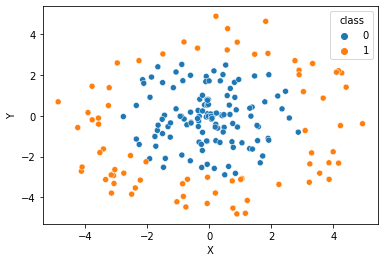

In [ ]:
l = []
for i in range(200):
  r = np.random.uniform(0,5)
  theta = np.random.uniform(0,2*math.pi)
  arr = [r*math.cos(theta),r*math.sin(theta)]
  l.append(arr)
PP = np.array(l)
P = pd.DataFrame(data = PP,columns = ["X","Y"])
classes = []
for i in range(200):
  dis = ((0-PP[i][0])**2 + (0-PP[i][1])**2)**0.5
  if(dis < 3):
    classes.append(0)
  else:
    classes.append(1)
classes = np.array(classes)
P["class"] = classes
print(P)
sns.scatterplot(data = P,x = "X",y="Y",hue = "class")

In [ ]:
X_train_2,X_test_2,Y_train_2,Y_test_2 = tts(P[["X","Y"]],P["class"],test_size =0.3,shuffle = True) 
model_2 = Gaussian_Bayes_Classifier_new(matrix = 3)
model_2.Train(X_train_2,Y_train_2)
pred_new = model_2.Test(X_test_2,Y_test_2)
print(pred_new[1])

{'Score': 0.9166666666666666}


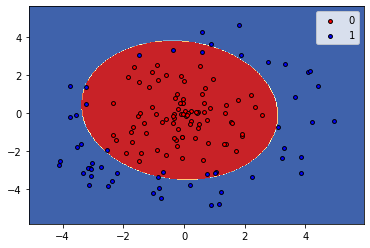

In [ ]:
model_2.Plot_Decision_Boundary(X_train_2,Y_train_2,'rb')

## Problem 2

### 1) Calculate the covariance matrix of the sample X , say Σ . Find the eigenvectors and eigenvalues of Σ and plot it superimposed on the datapoints X.

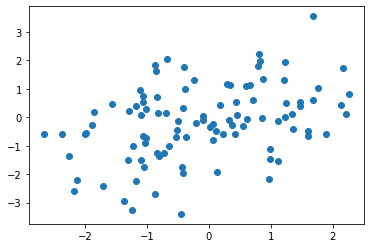

In [41]:
cov_mat = np.array([[1.5,0.5],[0.5,1.5]])
mean_mat = np.array([0,0])
X = np.random.multivariate_normal(mean_mat,cov_mat,100)
X = pd.DataFrame(data = X,columns = ["X","Y"])
plt.scatter(X["X"],X["Y"])


In [42]:
var_x = 0
var_y = 0
cov_xy = 0
sum_x =0
sum_y = 0
sum_xy = 0
mean_val_x = (X["X"].mean())
mean_val_y = (X["Y"].mean())
for i in range(100):
  sum_x += (X["X"][i] - mean_val_x)**2
  sum_y += (X["Y"][i] - mean_val_y)**2
var_x = sum_x/(99)
var_y = sum_y/(99)
for i in range(100):
  sum_xy += ((X["X"][i] - mean_val_x)*(X["Y"][i] - mean_val_y))
cov_xy = (sum_xy)/(99)
cov_mat_2 = np.array([[var_x,cov_xy],[cov_xy,var_y]])
print("Covariance Matrix is ")
print(cov_mat_2)

Covariance Matrix is 
[[1.41822945 0.60117617]
 [0.60117617 1.67054551]]


In [43]:
eig_val,eig_vec = np.linalg.eig(cov_mat_2)
print("eigen_values are \n",eig_val)
print()
print("eigen_vector is \n",eig_vec)

eigen_values are 
 [0.93011666 2.1586583 ]

eigen_vector is 
 [[-0.77633064 -0.6303259 ]
 [ 0.6303259  -0.77633064]]


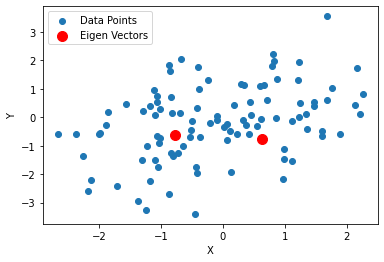

In [44]:
plt.scatter(X["X"],X["Y"],label='Data Points')
plt.scatter(eig_vec[:,0],eig_vec[:,1],color = 'r',label='Eigen Vectors',s=100)
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

### 2) Perform the transformation Y = Σ on the datapoints X. Calculate the covariance matrix s−1/2X of transformed datapoints Y , say Σ . Comment on the obtained covariance matrix and infer Y what was the purpose of the transformation.

In [45]:
inv_mat = np.linalg.inv(cov_mat_2)
mat_req = sls.sqrtm(inv_mat)
print(mat_req)

[[ 0.89534017 -0.17433343]
 [-0.17433343  0.82217173]]


In [46]:
Xtrans = X.transpose()
Y_new_trans = np.dot(mat_req,Xtrans)
Y_new = Y_new_trans.transpose()
print(Y_new)

[[ 1.88011112  0.26479727]
 [ 1.1396705  -1.38770532]
 [-1.64643121  0.10337295]
 [ 0.37218819 -0.27262823]
 [ 0.1008426  -0.20515469]
 [-0.71406633 -2.19099673]
 [-0.53194777 -0.8780337 ]
 [ 0.75403737  1.38748061]
 [-0.63550108 -1.24214462]
 [-0.83204244 -0.36101008]
 [ 1.51388085 -0.66231957]
 [-1.18792021  0.39858834]
 [-0.09295906  0.05469186]
 [-0.96536422  1.8153157 ]
 [ 1.02640619  0.20298814]
 [ 0.77016911 -0.16648139]
 [-1.09548575  1.65834367]
 [ 0.08564723  0.32256979]
 [-1.50709334 -1.74749573]
 [ 1.83910424 -0.00518467]
 [-0.06899065 -0.07314595]
 [-0.65918231 -1.63977505]
 [-1.78484461 -0.72151313]
 [ 0.33629566  1.68114841]
 [ 0.39627527  1.33482909]
 [ 1.240401    0.07836814]
 [-0.48331026 -0.96669448]
 [-1.52932468 -1.4413334 ]
 [-2.018321   -0.07438596]
 [ 1.5441923  -0.80658033]
 [ 1.3908711   0.5507763 ]
 [-0.76840831 -0.55639356]
 [-0.42229872 -0.91810346]
 [-1.69382475  0.48176596]
 [ 0.40043362  0.82345179]
 [ 0.5605281  -0.16482139]
 [ 0.06893155 -0.27622214]
 

In [47]:
Y_new_d = pd.DataFrame(data = Y_new,columns = ["X","Y"])
var_x = 0
var_y = 0
cov_xy = 0
sum_x =0
sum_y = 0
sum_xy = 0
mean_val_x = (Y_new_d["X"].mean())
mean_val_y = (Y_new_d["Y"].mean())
for i in range(100):
  sum_x += (Y_new_d["X"][i] - mean_val_x)**2
  sum_y += (Y_new_d["Y"][i] - mean_val_y)**2
var_x = sum_x/(99)
var_y = sum_y/(99)
for i in range(100):
  sum_xy += ((Y_new_d["X"][i] - mean_val_x)*(Y_new_d["Y"][i] - mean_val_y))
cov_xy = (sum_xy)/(99)
cov_mat_3 = np.array([[var_x,cov_xy],[cov_xy,var_y]])
print("Covariance Matrix is ")
print(cov_mat_3)

Covariance Matrix is 
[[1.00000000e+00 6.42723809e-17]
 [6.42723809e-17 1.00000000e+00]]


#### Comment on above result

##### The obtained covariance matrix is nearly an identity matrix.The purpose of the tranformation is that since the naive bayes assumes that the features are independent of each other so to minimize the correlation between the features we transform the matrix such that the covariance matrix becomes an identity matrix.

In [48]:
### The obtained covariance matrix is nearly an identity matrix.
### The purpose of the tranformation is that since the naive bayes assumes that the features are independent of each other so to 
### minimize the correlation between the features we transform the matrix such that the covariance matrix becomes an identity matrix.

### 3) Uniformly sample 10 points on the curve 𝑥 . Let these set of points be called . Plot x^2 + 𝑦^2 = 25 𝑃 points in P along with the datapoints in X. Make sure to give each point a different color [Hint : You can use properties like hue to do this] for better visualization. Report the eucledian distance of each point from µ using barplot.

In [49]:
l = []
for i in range(10):
  theta = np.random.uniform(0,2*math.pi)
  arr = [5*math.cos(theta),5*math.sin(theta)]
  l.append(arr)
P = np.array(l)
P = pd.DataFrame(data = P,columns = ["X","Y"])

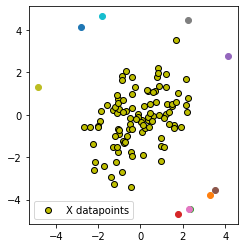

In [60]:
figure, axes = plt.subplots( 1 )
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22','#17becf']
for i in range(len(P)):
  axes.scatter(P["X"][i],P["Y"][i],color = colors[i])
axes.scatter(X["X"],X["Y"],color = 'y',label = 'X datapoints',edgecolors='black')
axes.set_aspect('equal', adjustable='box')
axes.legend()
plt.show()

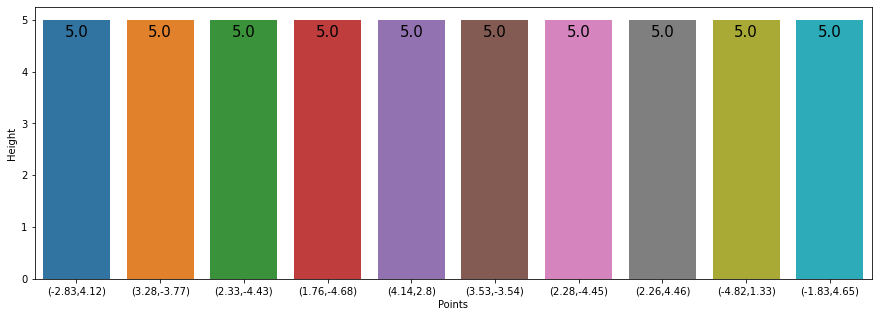

In [51]:
mean_val_x_P = P["X"].mean()
mean_val_y_P = P["Y"].mean()
mean_mat_P = np.array([mean_val_x_P,mean_val_y_P])
arr = []
for i in P.index:
  dis = ((0- P.iloc[i]["X"])**2 + (0- P.iloc[i]["Y"])**2)**0.5
  arr.append(dis)
points = {}
for i in range(10):
  point = "("+str(round(P.iloc[i]["X"],2))+","+str(round(P.iloc[i]["Y"],2))+")"
  points[point] = arr[i]
plt.figure(figsize = (15, 5))
dataf = pd.DataFrame(data = points.items(),columns = ["Points","Height"])
bplot = sns.barplot(x="Points",y="Height",data = dataf)
for b in bplot.patches:
    bplot.annotate(format(b.get_height(), '.1f'), (b.get_x() + b.get_width() / 2., b.get_height()),  ha = 'center', va = 'center', size=15,xytext = (0, -12), textcoords = 'offset points')
plt.show()

### 4)  Perform the transformation 𝑄 = Σ𝑠−1/2 𝑃 on the datapoints P. Calculate the eucledian distance of transformed datapoints Q from µ and report it using barplot . Plot points in Q along with datapoints in Y. Make sure that the color of point before and transformation doesn’t change. Comment on the difference in eucledian distance before and after transformations of the points in P

In [52]:
var_x = 0
var_y = 0
cov_xy = 0
sum_x =0
sum_y = 0
sum_xy = 0
mean_val_x = (P["X"].mean())
mean_val_y = (P["Y"].mean())
for i in range(10):
  sum_x += (P["X"][i] - mean_val_x)**2
  sum_y += (P["Y"][i] - mean_val_y)**2
var_x = sum_x/(9)
var_y = sum_y/(9)
for i in range(10):
  sum_xy += ((P["X"][i] - mean_val_x)*(P["Y"][i] - mean_val_y))
cov_xy = (sum_xy)/(9)
cov_mat_P = np.array([[var_x,cov_xy],[cov_xy,var_y]])
print("Covariance Matrix is ")
print(cov_mat_P)

Covariance Matrix is 
[[ 9.28529591 -6.10565411]
 [-6.10565411 17.2200027 ]]


In [71]:
inv_mat_P = np.linalg.inv(cov_mat_2)
mat_req_P = sls.sqrtm(inv_mat_P)
print(mat_req_P)

[[ 0.89534017 -0.17433343]
 [-0.17433343  0.82217173]]


In [72]:
Ptrans = P.transpose()
Y_new_trans_P = np.dot(mat_req_P,Ptrans)
Y_new_P = Y_new_trans_P.transpose()
Q = pd.DataFrame(data = Y_new_P,columns = ["X","Y"])
Q

,X,Y
0,-3.250532,3.883326
1,3.597849,-3.672177
2,2.854992,-4.044190
3,2.392901,-4.154392
4,3.222789,1.577488
5,3.776885,-3.527642
6,2.817467,-4.055962
7,1.247071,3.272278
8,-4.546948,1.937284
9,-2.447411,4.145061


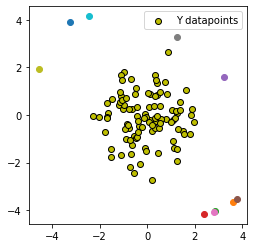

In [73]:
figure, axes = plt.subplots( 1 )
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22','#17becf']
for i in range(len(Q)):
  axes.scatter(Q["X"][i],Q["Y"][i],color = colors[i])
axes.scatter(Y_new_d["X"],Y_new_d["Y"],color = 'y',label = 'Y datapoints',edgecolors='black')
axes.set_aspect('equal', adjustable='box')
axes.legend()
plt.show()

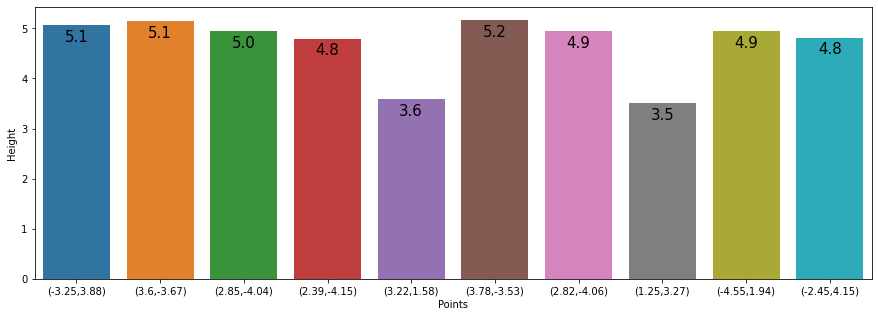

In [74]:
mean_val_x_Q = Q["X"].mean()
mean_val_y_Q = Q["Y"].mean()
mean_mat_Q = np.array([mean_val_x_Q,mean_val_y_Q])
arr_Q = []
for i in Q.index:
  dis = ((0 - Q.iloc[i]["X"])**2 + (0 - Q.iloc[i]["Y"])**2)**0.5
  arr_Q.append(dis)
points_Q = {}
for i in range(10):
  point = "("+str(round(Q.iloc[i]["X"],2))+","+str(round(Q.iloc[i]["Y"],2))+")"
  points_Q[point] = arr_Q[i]
plt.figure(figsize = (15, 5))
dataf_Q = pd.DataFrame(data = points_Q.items(),columns = ["Points","Height"])
bplot = sns.barplot(x="Points",y="Height",data = dataf_Q)
for b in bplot.patches:
    bplot.annotate(format(b.get_height(), '.1f'), (b.get_x() + b.get_width() / 2., b.get_height()),  ha = 'center', va = 'center', size=15,xytext = (0, -12), textcoords = 'offset points')
plt.show()